#### 1.3.1
Please make use of the data you have processed in the `1.2` to build a sample ranking model.
> We understand that the best model is not built in a day with limited features. Thus this task is only evaluating on your coding abilities and will not evaluate much on modelling abilities thus you do not need to spend too much time to optimize the model to get best performance

In [253]:
import pandas as pd
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LinearRegression,LogisticRegression
from sklearn.linear_model import Ridge
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score

In [254]:
df1 = pd.read_csv('data/hotel_sample_data_raw_bookings.csv')

In [255]:
df1

,hashed_order_number,item_status,order_created_timestamp_utc,hashed_customer_id,check_in_date,check_out_date,number_of_rooms,number_of_adult,number_of_child,number_of_room_nights,totalamount_usd,hotel_reference_id
0,2358866373745721362,BOOKING_CONFIRMED,2023-06-17 14:01:38.000000 UTC,8.896752e+18,2023-07-03,2023-07-04,1,2,0,1,127.187864,-9132627444666059375
1,5748509061990728483,BOOKING_CONFIRMED,2023-06-17 15:35:16.000000 UTC,-3.202937e+18,2023-07-07,2023-07-10,1,2,2,3,280.329488,-8331715157359125174
2,-6187797854503997068,BOOKING_CONFIRMED,2023-06-17 11:42:46.000000 UTC,-3.123644e+18,2023-06-25,2023-06-26,1,2,0,1,35.693189,47296919683376579
3,1291850139565304762,BOOKING_CONFIRMED,2023-06-17 08:54:16.000000 UTC,-4.085895e+18,2023-07-07,2023-07-09,2,6,0,4,86.145548,-3671747831870434544
4,1291850139565304762,BOOKING_CONFIRMED,2023-06-17 08:54:16.000000 UTC,-4.085895e+18,2023-07-07,2023-07-09,2,6,0,4,86.145548,-3671747831870434544
...,...,...,...,...,...,...,...,...,...,...,...,...
8831,8268547717435866475,BOOKING_CONFIRMED,2023-09-28 10:50:12.000000 UTC,-7.961614e+18,2023-11-02,2023-11-05,1,2,0,3,134.443552,2756480870960102469
8832,4509702731939878540,BOOKING_CONFIRMED,2023-09-28 08:09:41.000000 UTC,-1.682207e+18,2023-10-03,2023-10-05,1,2,0,2,102.793158,-4579544565197914008
8833,5300340177296839716,BOOKING_CONFIRMED,2023-09-28 08:12:43.000000 UTC,-1.682207e+18,2023-10-03,2023-10-05,1,2,0,2,102.793158,-4579544565197914008
8834,4534259201663441162,BOOKING_CONFIRMED,2023-09-28 04:31:35.000000 UTC,-6.532790e+18,2023-09-28,2023-09-29,1,2,0,1,52.988551,2194202345658462775


In [256]:
df1.columns

Index(['hashed_order_number', 'item_status', 'order_created_timestamp_utc',
       'hashed_customer_id', 'check_in_date', 'check_out_date',
       'number_of_rooms', 'number_of_adult', 'number_of_child',
       'number_of_room_nights', 'totalamount_usd', 'hotel_reference_id'],
      dtype='object')

### Getting rid of 'item_status', 'hashed_customer_id' columns as they are of little value to us!

In [257]:
df1 = df1.loc[:,~df1.columns.isin(['item_status','hashed_customer_id'])]

In [258]:
df1

,hashed_order_number,order_created_timestamp_utc,check_in_date,check_out_date,number_of_rooms,number_of_adult,number_of_child,number_of_room_nights,totalamount_usd,hotel_reference_id
0,2358866373745721362,2023-06-17 14:01:38.000000 UTC,2023-07-03,2023-07-04,1,2,0,1,127.187864,-9132627444666059375
1,5748509061990728483,2023-06-17 15:35:16.000000 UTC,2023-07-07,2023-07-10,1,2,2,3,280.329488,-8331715157359125174
2,-6187797854503997068,2023-06-17 11:42:46.000000 UTC,2023-06-25,2023-06-26,1,2,0,1,35.693189,47296919683376579
3,1291850139565304762,2023-06-17 08:54:16.000000 UTC,2023-07-07,2023-07-09,2,6,0,4,86.145548,-3671747831870434544
4,1291850139565304762,2023-06-17 08:54:16.000000 UTC,2023-07-07,2023-07-09,2,6,0,4,86.145548,-3671747831870434544
...,...,...,...,...,...,...,...,...,...,...
8831,8268547717435866475,2023-09-28 10:50:12.000000 UTC,2023-11-02,2023-11-05,1,2,0,3,134.443552,2756480870960102469
8832,4509702731939878540,2023-09-28 08:09:41.000000 UTC,2023-10-03,2023-10-05,1,2,0,2,102.793158,-4579544565197914008
8833,5300340177296839716,2023-09-28 08:12:43.000000 UTC,2023-10-03,2023-10-05,1,2,0,2,102.793158,-4579544565197914008
8834,4534259201663441162,2023-09-28 04:31:35.000000 UTC,2023-09-28,2023-09-29,1,2,0,1,52.988551,2194202345658462775


### Keeping only the date part in order_created_timestamp_utc column

In [259]:
df1['order_created'] = pd.to_datetime(df1.order_created_timestamp_utc).dt.date

C:\Users\sharm\AppData\Local\Temp/ipykernel_14564/452934843.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['order_created'] = pd.to_datetime(df1.order_created_timestamp_utc).dt.date


In [260]:
df1

,hashed_order_number,order_created_timestamp_utc,check_in_date,check_out_date,number_of_rooms,number_of_adult,number_of_child,number_of_room_nights,totalamount_usd,hotel_reference_id,order_created
0,2358866373745721362,2023-06-17 14:01:38.000000 UTC,2023-07-03,2023-07-04,1,2,0,1,127.187864,-9132627444666059375,2023-06-17
1,5748509061990728483,2023-06-17 15:35:16.000000 UTC,2023-07-07,2023-07-10,1,2,2,3,280.329488,-8331715157359125174,2023-06-17
2,-6187797854503997068,2023-06-17 11:42:46.000000 UTC,2023-06-25,2023-06-26,1,2,0,1,35.693189,47296919683376579,2023-06-17
3,1291850139565304762,2023-06-17 08:54:16.000000 UTC,2023-07-07,2023-07-09,2,6,0,4,86.145548,-3671747831870434544,2023-06-17
4,1291850139565304762,2023-06-17 08:54:16.000000 UTC,2023-07-07,2023-07-09,2,6,0,4,86.145548,-3671747831870434544,2023-06-17
...,...,...,...,...,...,...,...,...,...,...,...
8831,8268547717435866475,2023-09-28 10:50:12.000000 UTC,2023-11-02,2023-11-05,1,2,0,3,134.443552,2756480870960102469,2023-09-28
8832,4509702731939878540,2023-09-28 08:09:41.000000 UTC,2023-10-03,2023-10-05,1,2,0,2,102.793158,-4579544565197914008,2023-09-28
8833,5300340177296839716,2023-09-28 08:12:43.000000 UTC,2023-10-03,2023-10-05,1,2,0,2,102.793158,-4579544565197914008,2023-09-28
8834,4534259201663441162,2023-09-28 04:31:35.000000 UTC,2023-09-28,2023-09-29,1,2,0,1,52.988551,2194202345658462775,2023-09-28


In [261]:
df1.drop(columns=['order_created_timestamp_utc'],inplace=True)

C:\Users\sharm\AppData\Local\Temp/ipykernel_14564/778357238.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.drop(columns=['order_created_timestamp_utc'],inplace=True)


In [262]:
df1

,hashed_order_number,check_in_date,check_out_date,number_of_rooms,number_of_adult,number_of_child,number_of_room_nights,totalamount_usd,hotel_reference_id,order_created
0,2358866373745721362,2023-07-03,2023-07-04,1,2,0,1,127.187864,-9132627444666059375,2023-06-17
1,5748509061990728483,2023-07-07,2023-07-10,1,2,2,3,280.329488,-8331715157359125174,2023-06-17
2,-6187797854503997068,2023-06-25,2023-06-26,1,2,0,1,35.693189,47296919683376579,2023-06-17
3,1291850139565304762,2023-07-07,2023-07-09,2,6,0,4,86.145548,-3671747831870434544,2023-06-17
4,1291850139565304762,2023-07-07,2023-07-09,2,6,0,4,86.145548,-3671747831870434544,2023-06-17
...,...,...,...,...,...,...,...,...,...,...
8831,8268547717435866475,2023-11-02,2023-11-05,1,2,0,3,134.443552,2756480870960102469,2023-09-28
8832,4509702731939878540,2023-10-03,2023-10-05,1,2,0,2,102.793158,-4579544565197914008,2023-09-28
8833,5300340177296839716,2023-10-03,2023-10-05,1,2,0,2,102.793158,-4579544565197914008,2023-09-28
8834,4534259201663441162,2023-09-28,2023-09-29,1,2,0,1,52.988551,2194202345658462775,2023-09-28


In [263]:
df2 = pd.read_csv('data/hotel_sample_data_raw_inventories.csv')

In [264]:
df2

,hotel_reference_id,hotel_country,hotel_city,hotel_state_province,hotel_category,hotel_class
0,-8086547192259181023,THAILAND,HAT YAI,SONGKHLA,Hotel,3.0
1,4957414607136314110,PHILIPPINES,TAGUIG,MANILA,Hotel,4.0
2,-6450845121000940741,THAILAND,BANGKOK,NaN,Hotel,4.0
3,4506399878130481133,PHILIPPINES,BORACAY,NaN,Hotel,5.0
4,1459919767144637259,PHILIPPINES,BACOLOD,NaN,NaN,NaN
...,...,...,...,...,...,...
3958,368174645418234359,THAILAND,CHIANG MAI,CHIANG MAI,Hotel,4.0
3959,-7172954568082813077,THAILAND,BANGKOK,NaN,Hotel,5.0
3960,4501216308979216223,THAILAND,BANGKOK,NaN,Hotel,4.0
3961,5573465037638235976,THAILAND,PATONG,PHUKET,NaN,NaN


## Prelimenary checks!

In [265]:
df2.hotel_country.value_counts()

hotel_country
THAILAND       2726
PHILIPPINES    1237
Name: count, dtype: int64

In [266]:
df2.hotel_category.value_counts()

hotel_category
Hotel         3131
Apartment        2
Guesthouse       1
Name: count, dtype: int64

In [267]:
df1.isna().any()

hashed_order_number      False
check_in_date            False
check_out_date           False
number_of_rooms          False
number_of_adult          False
number_of_child          False
number_of_room_nights    False
totalamount_usd          False
hotel_reference_id       False
order_created            False
dtype: bool

In [268]:
df2.isna().any()

hotel_reference_id      False
hotel_country           False
hotel_city              False
hotel_state_province     True
hotel_category           True
hotel_class              True
dtype: bool

In [269]:
df2.hotel_category.value_counts()

hotel_category
Hotel         3131
Apartment        2
Guesthouse       1
Name: count, dtype: int64

In [270]:
df2.hotel_class.value_counts()

hotel_class
3.0    1237
4.0     733
3.5     325
5.0     300
2.5     211
2.0     204
4.5      70
1.0      16
1.5       5
4.6       1
Name: count, dtype: int64

Getting rid of NaN columns as they tend to be very skewed !


In [271]:
df2.dropna(axis=1,inplace=True)

In [272]:
df2

,hotel_reference_id,hotel_country,hotel_city
0,-8086547192259181023,THAILAND,HAT YAI
1,4957414607136314110,PHILIPPINES,TAGUIG
2,-6450845121000940741,THAILAND,BANGKOK
3,4506399878130481133,PHILIPPINES,BORACAY
4,1459919767144637259,PHILIPPINES,BACOLOD
...,...,...,...
3958,368174645418234359,THAILAND,CHIANG MAI
3959,-7172954568082813077,THAILAND,BANGKOK
3960,4501216308979216223,THAILAND,BANGKOK
3961,5573465037638235976,THAILAND,PATONG


In [273]:
df1.dtypes

hashed_order_number        int64
check_in_date             object
check_out_date            object
number_of_rooms            int64
number_of_adult            int64
number_of_child            int64
number_of_room_nights      int64
totalamount_usd          float64
hotel_reference_id         int64
order_created             object
dtype: object

In [274]:
df1

,hashed_order_number,check_in_date,check_out_date,number_of_rooms,number_of_adult,number_of_child,number_of_room_nights,totalamount_usd,hotel_reference_id,order_created
0,2358866373745721362,2023-07-03,2023-07-04,1,2,0,1,127.187864,-9132627444666059375,2023-06-17
1,5748509061990728483,2023-07-07,2023-07-10,1,2,2,3,280.329488,-8331715157359125174,2023-06-17
2,-6187797854503997068,2023-06-25,2023-06-26,1,2,0,1,35.693189,47296919683376579,2023-06-17
3,1291850139565304762,2023-07-07,2023-07-09,2,6,0,4,86.145548,-3671747831870434544,2023-06-17
4,1291850139565304762,2023-07-07,2023-07-09,2,6,0,4,86.145548,-3671747831870434544,2023-06-17
...,...,...,...,...,...,...,...,...,...,...
8831,8268547717435866475,2023-11-02,2023-11-05,1,2,0,3,134.443552,2756480870960102469,2023-09-28
8832,4509702731939878540,2023-10-03,2023-10-05,1,2,0,2,102.793158,-4579544565197914008,2023-09-28
8833,5300340177296839716,2023-10-03,2023-10-05,1,2,0,2,102.793158,-4579544565197914008,2023-09-28
8834,4534259201663441162,2023-09-28,2023-09-29,1,2,0,1,52.988551,2194202345658462775,2023-09-28


# Let's try to find a pattern in the number of bookings per hotel.

In [275]:
result1 = df1.groupby('hotel_reference_id')['order_created'].count().reset_index(name='count')
result1.sort_values(by='count',ascending=False)

,hotel_reference_id,count
3185,5826644684423694294,94
2450,2478486070906989856,80
1954,161132597924976796,66
3701,8309016608810884336,59
3867,9103788713090388247,51
...,...,...
1618,-1404064049905617291,1
1619,-1397607215770202941,1
1620,-1394506830728658186,1
1621,-1393604809225450676,1


In [276]:
result1['binned_columns'] = pd.cut(result1['count'],bins=[0,10,20,30,40,50,60,70,80,90,100],labels=['0-10','10-20','20-30','30-40','40-50','50-60','60-70','70-80','80-90','90-100'])

In [277]:
result1.sort_values(by='count',ascending=False)

,hotel_reference_id,count,binned_columns
3185,5826644684423694294,94,90-100
2450,2478486070906989856,80,70-80
1954,161132597924976796,66,60-70
3701,8309016608810884336,59,50-60
3867,9103788713090388247,51,50-60
...,...,...,...
1618,-1404064049905617291,1,0-10
1619,-1397607215770202941,1,0-10
1620,-1394506830728658186,1,0-10
1621,-1393604809225450676,1,0-10


Text(0, 0.5, 'Number of Hotels')

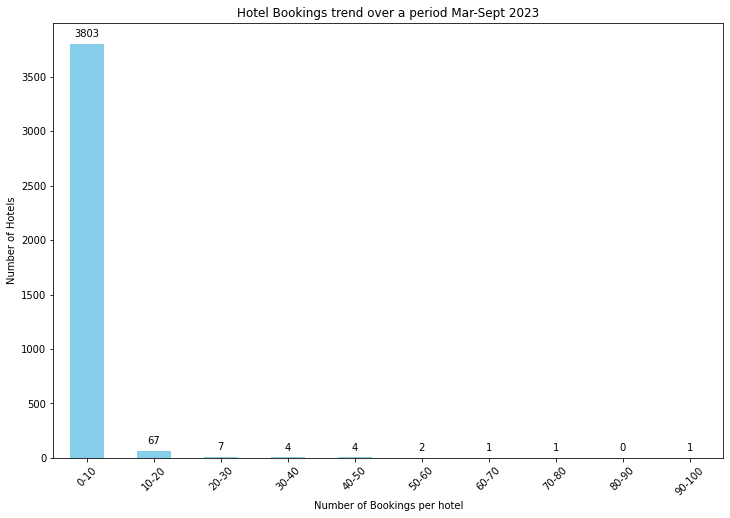

In [278]:
import matplotlib.pyplot as plt


ax = result1['binned_columns'].value_counts().sort_index().plot(kind='bar',color='skyblue',figsize=[12,8],rot=45)


# Annotate each bar with its count value
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

# Customize the plot
plt.title('Hotel Bookings trend over a period Mar-Sept 2023')
plt.xlabel('Number of Bookings per hotel')
plt.ylabel('Number of Hotels')

It seems that most of the data contains hotels with only 1-10 bookings!

There is only 1 hotel with bookings exceeding 90!

## Next, let's look at the Date range!

In [279]:
df1

,hashed_order_number,check_in_date,check_out_date,number_of_rooms,number_of_adult,number_of_child,number_of_room_nights,totalamount_usd,hotel_reference_id,order_created
0,2358866373745721362,2023-07-03,2023-07-04,1,2,0,1,127.187864,-9132627444666059375,2023-06-17
1,5748509061990728483,2023-07-07,2023-07-10,1,2,2,3,280.329488,-8331715157359125174,2023-06-17
2,-6187797854503997068,2023-06-25,2023-06-26,1,2,0,1,35.693189,47296919683376579,2023-06-17
3,1291850139565304762,2023-07-07,2023-07-09,2,6,0,4,86.145548,-3671747831870434544,2023-06-17
4,1291850139565304762,2023-07-07,2023-07-09,2,6,0,4,86.145548,-3671747831870434544,2023-06-17
...,...,...,...,...,...,...,...,...,...,...
8831,8268547717435866475,2023-11-02,2023-11-05,1,2,0,3,134.443552,2756480870960102469,2023-09-28
8832,4509702731939878540,2023-10-03,2023-10-05,1,2,0,2,102.793158,-4579544565197914008,2023-09-28
8833,5300340177296839716,2023-10-03,2023-10-05,1,2,0,2,102.793158,-4579544565197914008,2023-09-28
8834,4534259201663441162,2023-09-28,2023-09-29,1,2,0,1,52.988551,2194202345658462775,2023-09-28


In [280]:
df1['order_created'] = pd.DatetimeIndex(df1.order_created)

C:\Users\sharm\AppData\Local\Temp/ipykernel_14564/256173784.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['order_created'] = pd.DatetimeIndex(df1.order_created)


In [281]:
df1

,hashed_order_number,check_in_date,check_out_date,number_of_rooms,number_of_adult,number_of_child,number_of_room_nights,totalamount_usd,hotel_reference_id,order_created
0,2358866373745721362,2023-07-03,2023-07-04,1,2,0,1,127.187864,-9132627444666059375,2023-06-17
1,5748509061990728483,2023-07-07,2023-07-10,1,2,2,3,280.329488,-8331715157359125174,2023-06-17
2,-6187797854503997068,2023-06-25,2023-06-26,1,2,0,1,35.693189,47296919683376579,2023-06-17
3,1291850139565304762,2023-07-07,2023-07-09,2,6,0,4,86.145548,-3671747831870434544,2023-06-17
4,1291850139565304762,2023-07-07,2023-07-09,2,6,0,4,86.145548,-3671747831870434544,2023-06-17
...,...,...,...,...,...,...,...,...,...,...
8831,8268547717435866475,2023-11-02,2023-11-05,1,2,0,3,134.443552,2756480870960102469,2023-09-28
8832,4509702731939878540,2023-10-03,2023-10-05,1,2,0,2,102.793158,-4579544565197914008,2023-09-28
8833,5300340177296839716,2023-10-03,2023-10-05,1,2,0,2,102.793158,-4579544565197914008,2023-09-28
8834,4534259201663441162,2023-09-28,2023-09-29,1,2,0,1,52.988551,2194202345658462775,2023-09-28


In [282]:
result = df1.groupby(['order_created'])['hashed_order_number'].agg(count='count').reset_index()
result.set_index(pd.DatetimeIndex(result['order_created']),inplace=True)
result.drop(columns=['order_created'],inplace=True)
result

,count
order_created,
2023-03-01,64
2023-03-02,79
2023-03-03,60
2023-03-04,58
2023-03-05,77
...,...
2023-09-26,43
2023-09-27,26
2023-09-28,16


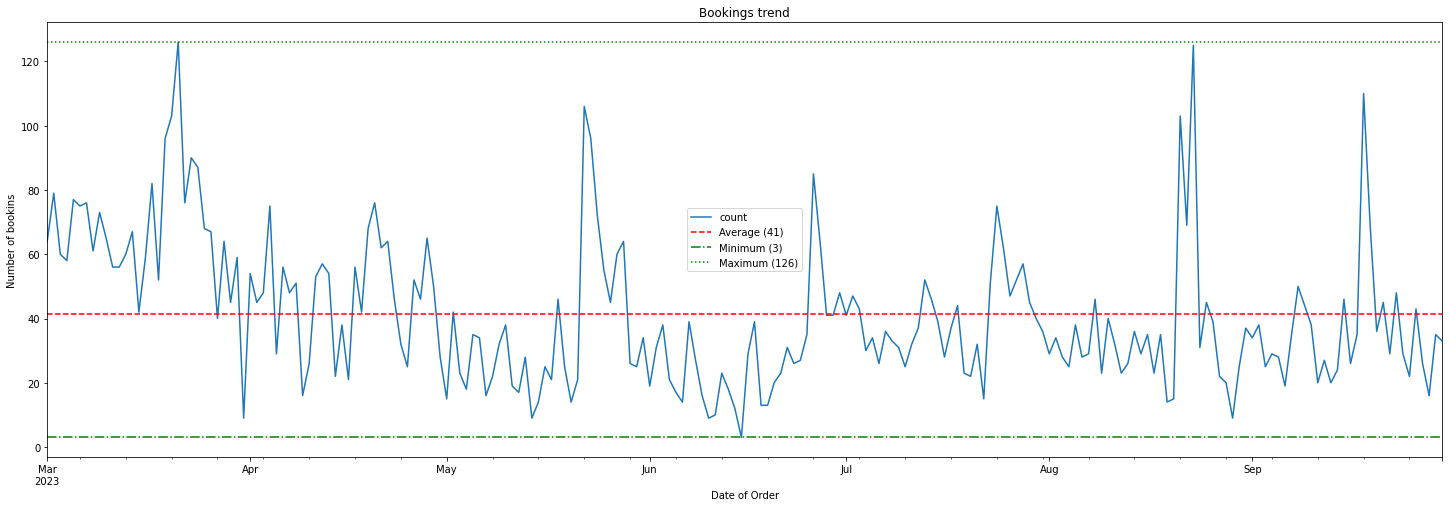

In [283]:
result.plot(y='count',kind='line',figsize=[25,8])
avg_count = result['count'].mean()
min_count = result['count'].min()
max_count = result['count'].max()
plt.title('Bookings trend')
plt.xlabel('Date of Order')
plt.ylabel('Number of bookins')
plt.axhline(y=avg_count,color='r',linestyle='--',label=f'Average ({avg_count:0.0f})')
plt.axhline(y=min_count,color='g',linestyle='-.',label=f'Minimum ({min_count:0.0f})')
plt.axhline(y=max_count,color='g',linestyle=':',label=f'Maximum ({max_count:0.0f})')
plt.legend()
plt.show()

It seems that on an average ~41 bookings have been made per day throughout the year.
There are peaks observed at the end of the months for e.g. End of April, End of May, End of June, End of July and so on.

Also, there are sudden drops sometimes.

- Highest number of bookings in a day: **126**.
- Lowest number of bokings in a day: **3**.

The above findings corroborates with usual tourist seasonal patterns:

**November to February (Peak season)** : This period is the cool and dry season, making it popular among tourists.

**March to May (Shoulder season)**: The weather becomes hotter and tourist footfall descreases.

**June to October (Off-Peak season)**: This is the rainy season. While the rain can be heavy, it doesn't necessarily deter all travelers.

In [284]:
df1

,hashed_order_number,check_in_date,check_out_date,number_of_rooms,number_of_adult,number_of_child,number_of_room_nights,totalamount_usd,hotel_reference_id,order_created
0,2358866373745721362,2023-07-03,2023-07-04,1,2,0,1,127.187864,-9132627444666059375,2023-06-17
1,5748509061990728483,2023-07-07,2023-07-10,1,2,2,3,280.329488,-8331715157359125174,2023-06-17
2,-6187797854503997068,2023-06-25,2023-06-26,1,2,0,1,35.693189,47296919683376579,2023-06-17
3,1291850139565304762,2023-07-07,2023-07-09,2,6,0,4,86.145548,-3671747831870434544,2023-06-17
4,1291850139565304762,2023-07-07,2023-07-09,2,6,0,4,86.145548,-3671747831870434544,2023-06-17
...,...,...,...,...,...,...,...,...,...,...
8831,8268547717435866475,2023-11-02,2023-11-05,1,2,0,3,134.443552,2756480870960102469,2023-09-28
8832,4509702731939878540,2023-10-03,2023-10-05,1,2,0,2,102.793158,-4579544565197914008,2023-09-28
8833,5300340177296839716,2023-10-03,2023-10-05,1,2,0,2,102.793158,-4579544565197914008,2023-09-28
8834,4534259201663441162,2023-09-28,2023-09-29,1,2,0,1,52.988551,2194202345658462775,2023-09-28


In [285]:
result2 = df1.groupby('totalamount_usd')['hashed_order_number'].count().reset_index(name="count")
result2.sort_values(by='totalamount_usd',ascending=False)

,totalamount_usd,count
7792,3928.066871,1
7791,3418.742375,1
7790,3163.701108,1
7789,2837.097491,1
7788,2350.426133,1
...,...,...
4,5.462467,1
3,4.954317,1
2,4.790978,1
1,4.155670,2


In [286]:
result2.dtypes

totalamount_usd    float64
count                int64
dtype: object

In [287]:
result2['binned_usd'] = pd.cut(result2.totalamount_usd,bins=[0,100,200,300,400,500,600,700,800,900,1000,2000,3000,4000],labels=['0-100$','100-200$','200-300$','300-400$','400-500$','500-600$','600-700$','700-800$','800-900$','900-1000$','1000-2000$','2000-3000$','3000-4000$'])
result2 = result2.groupby(['binned_usd']).sum(['count'])

In [288]:
result2

,totalamount_usd,count
binned_usd,,
0-100$,255630.250002,6301
100-200$,178329.814002,1450
200-300$,110159.064329,545
300-400$,63409.991403,216
400-500$,41086.293454,116
500-600$,24854.343481,58
600-700$,23941.925189,49
700-800$,18523.748470,32
800-900$,8360.381768,13


[]

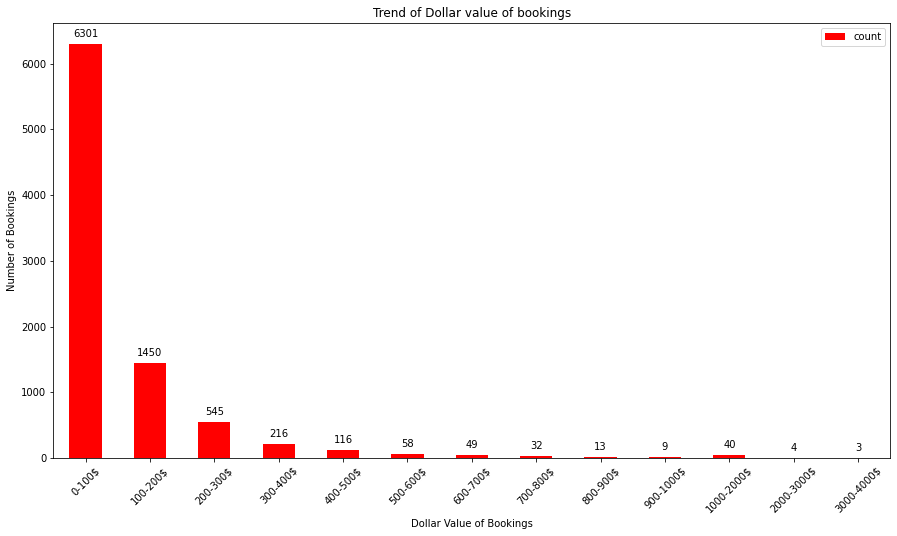

In [289]:
ax = result2.plot(y='count',kind='bar',color='red',legend=True,figsize=[15,8],rot=45)
# Annotate each bar with its count value
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

# Customize the plot
plt.title('Trend of Dollar value of bookings')
plt.xlabel('Dollar Value of Bookings')
plt.ylabel('Number of Bookings')
plt.plot()

- it is evident from the graph above that most of the bookings (~71%) were of lower dollar value of **0-100$**.

- Rest are divided primarily in the into (100-200),(200-300) ,(300-400) and (400-500) buckets.

- There is one exxepction of **40** bookings in **1000-2000$** brackets and these may denote the luxury and premium bookings or longer length of stays!

## Let's confirm the last observation

In [290]:
df1['LengthOfStay'] = pd.to_datetime(df1['check_out_date'])-pd.to_datetime(df1['check_in_date'])
result3 = df1[['LengthOfStay','totalamount_usd']].sort_values(by=['totalamount_usd'],ascending=False)
result3

C:\Users\sharm\AppData\Local\Temp/ipykernel_14564/1956633441.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['LengthOfStay'] = pd.to_datetime(df1['check_out_date'])-pd.to_datetime(df1['check_in_date'])


,LengthOfStay,totalamount_usd
7131,12 days,3928.066871
550,5 days,3418.742375
4882,12 days,3163.701108
4883,12 days,2837.097491
563,14 days,2350.426133
...,...,...
5571,1 days,4.954317
2294,1 days,4.790978
4899,1 days,4.155670
4900,1 days,4.155670


In [291]:
result3 = result3.groupby(['LengthOfStay'])['totalamount_usd'].agg('mean').reset_index()
result3['LengthOfStay'] = result3.LengthOfStay.apply(lambda x: x.days)

In [292]:
result3

,LengthOfStay,totalamount_usd
0,1,48.583722
1,2,112.699174
2,3,201.771943
3,4,256.843084
4,5,341.794119
5,6,354.351194
6,7,352.174055
7,8,397.830446
8,9,363.341854
9,10,657.763723


In [293]:
result3.dtypes

LengthOfStay         int64
totalamount_usd    float64
dtype: object

<Axes: xlabel='LengthOfStay', ylabel='totalamount_usd'>

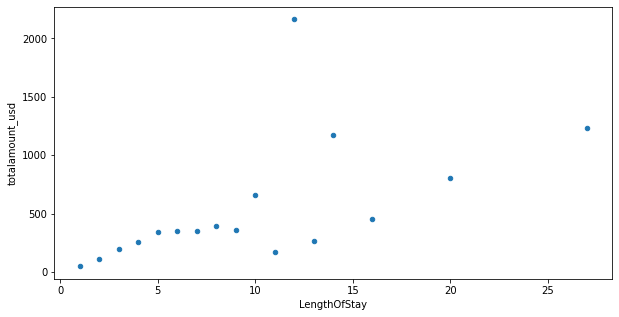

In [294]:
result3.plot.scatter(x='LengthOfStay',y='totalamount_usd',figsize=[10,5])

Clearly, both the 'length of stay' in the hotel and the amount of booking are **positively correlated**, which confirms our previous hupothesis.

## 1.3 Data modelling
### 13.1 Please make use of the data you have processed in the 1.2 to build a sample ranking model.



### Looking at the two datasets, We are not given explicit rating data. Rather, implicit indicators are available that we could use to  denote user preferences for particular hotels.


In [295]:
df1.columns

Index(['hashed_order_number', 'check_in_date', 'check_out_date',
       'number_of_rooms', 'number_of_adult', 'number_of_child',
       'number_of_room_nights', 'totalamount_usd', 'hotel_reference_id',
       'order_created', 'LengthOfStay'],
      dtype='object')

In [296]:
df2.columns

Index(['hotel_reference_id', 'hotel_country', 'hotel_city'], dtype='object')

Some of the implicit signals or indirect signals that can be derived:

### 1. Booking Frequency:
- **'hashed_order_number'**: Counting the number of unique order numbers associated with a specific hotel might indicate its booking frequency. Higher booking frequency can imply popularity or preference for that hotel.

### 2. Total Amount Spent:
- **'totalamount_usd'**: Hotels with higher total amounts spent might suggest higher customer satisfaction or preference for more luxurious options. This could serve as an implicit signal of hotel preference.

### 3. Temporal Information:
- **'order_created_timestamp_utc'**, **'check_in_date'**, **'check_out_date'**: Analyzing recent bookings or the frequency of bookings over time might indicate current popularity or relevance. More recent bookings might imply current preference.



These implicit signals derived from the provided columns can serve as proxies for user preferences or popularity without explicit user ratings. Leveraging these signals can help in creating a ranking or recommendation system for hotels based on observed patterns and behaviors within the dataset.

## Feature Engineering

1. **Booking Frequency**: Count the number of bookings for each hotel within the last 7 months.

### Let's look at both the dataframes together

In [297]:
dfmerge = pd.merge(df1,df2,on='hotel_reference_id',how='inner')

In [298]:
df_1 = pd.DataFrame(dfmerge.groupby('hotel_reference_id')['hashed_order_number'].agg("count")).rename(columns={'hashed_order_number':'NumBookings'})
df_1

,NumBookings
hotel_reference_id,
-9217817084420152490,1
-9213121850607123932,5
-9212955825472495622,1
-9206097099752226690,10
-9190388718207234771,1
...,...
9199769590992075998,1
9206668472951073890,2
9212961045924794722,1


2. **Total Revenue**: Calculate the total revenue generated by each hotel.


In [299]:
df_2 = pd.DataFrame(dfmerge.groupby('hotel_reference_id')['totalamount_usd'].sum().round(2)).rename(columns={'totalamount_usd':'TotalRevenue'}) 
df_2

,TotalRevenue
hotel_reference_id,
-9217817084420152490,71.01
-9213121850607123932,421.06
-9212955825472495622,52.37
-9206097099752226690,1797.92
-9190388718207234771,50.58
...,...
9199769590992075998,40.78
9206668472951073890,129.47
9212961045924794722,24.30


3. **Temporal Factors**: Analyze recent bookings or booking trends over time (e.g., month-wise or week-wise).
#### Monthly Avg bookings

In [300]:
dfmerge

,hashed_order_number,check_in_date,check_out_date,number_of_rooms,number_of_adult,number_of_child,number_of_room_nights,totalamount_usd,hotel_reference_id,order_created,LengthOfStay,hotel_country,hotel_city
0,2358866373745721362,2023-07-03,2023-07-04,1,2,0,1,127.187864,-9132627444666059375,2023-06-17,1 days,THAILAND,BANGKOK
1,-538379148510437431,2023-07-07,2023-07-08,1,2,0,1,98.576460,-9132627444666059375,2023-06-16,1 days,THAILAND,BANGKOK
2,-5581872879912733630,2023-07-21,2023-07-24,1,1,0,3,457.730569,-9132627444666059375,2023-07-19,3 days,THAILAND,BANGKOK
3,5620840056621492145,2023-05-01,2023-05-02,1,2,0,1,120.543376,-9132627444666059375,2023-03-20,1 days,THAILAND,BANGKOK
4,5334886277142097834,2023-07-04,2023-07-05,1,2,0,1,123.016402,-9132627444666059375,2023-06-01,1 days,THAILAND,BANGKOK
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8880,-2682306631784419183,2023-04-23,2023-04-24,1,2,0,1,24.983653,-3434222967020892188,2023-04-22,1 days,THAILAND,BANGKOK
8881,8486429960737068224,2023-04-30,2023-05-01,1,2,0,1,109.179961,6296940604802416595,2023-04-22,1 days,THAILAND,PATTAYA
8882,409444007118477498,2023-04-23,2023-04-24,1,2,0,1,22.425276,7824834503601673656,2023-04-22,1 days,THAILAND,PHITSANULOK
8883,404006294254611927,2023-11-16,2023-11-20,1,4,0,4,697.553370,4173146149948563667,2023-09-27,4 days,THAILAND,BANGKOK


In [301]:
dfmerge.reset_index(inplace=True)

In [302]:
dfmerge.dtypes # already 'order_created' is a datetime as shown below

index                              int64
hashed_order_number                int64
check_in_date                     object
check_out_date                    object
number_of_rooms                    int64
number_of_adult                    int64
number_of_child                    int64
number_of_room_nights              int64
totalamount_usd                  float64
hotel_reference_id                 int64
order_created             datetime64[ns]
LengthOfStay             timedelta64[ns]
hotel_country                     object
hotel_city                        object
dtype: object

In [303]:
monthly_bookings = pd.DataFrame(dfmerge.groupby(['hotel_reference_id',dfmerge['order_created'].dt.to_period('M')])['hashed_order_number'].count())
monthly_bookings.reset_index(inplace=True)

In [304]:
monthly_bookings

,hotel_reference_id,order_created,hashed_order_number
0,-9217817084420152490,2023-03,1
1,-9213121850607123932,2023-04,1
2,-9213121850607123932,2023-05,2
3,-9213121850607123932,2023-06,1
4,-9213121850607123932,2023-09,1
...,...,...,...
5343,9206668472951073890,2023-05,1
5344,9206668472951073890,2023-07,1
5345,9212961045924794722,2023-06,1
5346,9215996263288881753,2023-03,1


In [305]:
# Generate a DataFrame with all combinations of hotels and months within the data range
all_hotels = dfmerge['hotel_reference_id'].unique()
all_months = pd.date_range(dfmerge['order_created'].min().to_period('M').start_time, dfmerge['order_created'].max().to_period('M').end_time, freq='MS')

full_index = pd.MultiIndex.from_product([all_hotels, all_months.to_period('M')], names=['hotel_reference_id', 'order_created'])

# Reindex to include zero entries for missing combinations (hotels with no bookings in certain months)
monthly_bookings = monthly_bookings.set_index(['hotel_reference_id', 'order_created']).reindex(full_index, fill_value=0).reset_index()

In [306]:
full_index

MultiIndex([(-9132627444666059375, '2023-03'),
            (-9132627444666059375, '2023-04'),
            (-9132627444666059375, '2023-05'),
            (-9132627444666059375, '2023-06'),
            (-9132627444666059375, '2023-07'),
            (-9132627444666059375, '2023-08'),
            (-9132627444666059375, '2023-09'),
            (-8331715157359125174, '2023-03'),
            (-8331715157359125174, '2023-04'),
            (-8331715157359125174, '2023-05'),
            ...
            ( 4173146149948563667, '2023-07'),
            ( 4173146149948563667, '2023-08'),
            ( 4173146149948563667, '2023-09'),
            (  578033525661496185, '2023-03'),
            (  578033525661496185, '2023-04'),
            (  578033525661496185, '2023-05'),
            (  578033525661496185, '2023-06'),
            (  578033525661496185, '2023-07'),
            (  578033525661496185, '2023-08'),
            (  578033525661496185, '2023-09')],
           names=['hotel_reference_id', 'or

In [307]:
monthly_bookings

,hotel_reference_id,order_created,hashed_order_number
0,-9132627444666059375,2023-03,1
1,-9132627444666059375,2023-04,6
2,-9132627444666059375,2023-05,1
3,-9132627444666059375,2023-06,4
4,-9132627444666059375,2023-07,1
...,...,...,...
27225,578033525661496185,2023-05,0
27226,578033525661496185,2023-06,0
27227,578033525661496185,2023-07,0
27228,578033525661496185,2023-08,0


In [308]:
df_3 = pd.DataFrame(monthly_bookings.groupby('hotel_reference_id')['hashed_order_number'].mean()).rename(columns={'hashed_order_number':'AvgMonthlyBooking'})
df_3

,AvgMonthlyBooking
hotel_reference_id,
-9217817084420152490,0.142857
-9213121850607123932,0.714286
-9212955825472495622,0.142857
-9206097099752226690,1.428571
-9190388718207234771,0.142857
...,...
9199769590992075998,0.142857
9206668472951073890,0.285714
9212961045924794722,0.142857


In [309]:
dfmerge[dfmerge.hotel_reference_id==-9217817084420152490]

,index,hashed_order_number,check_in_date,check_out_date,number_of_rooms,number_of_adult,number_of_child,number_of_room_nights,totalamount_usd,hotel_reference_id,order_created,LengthOfStay,hotel_country,hotel_city
8262,8262,-1271345681364480651,2023-03-16,2023-03-17,1,1,0,1,71.014664,-9217817084420152490,2023-03-16,1 days,PHILIPPINES,MANILA


In [310]:
dfmerge[dfmerge.hotel_reference_id==-9213121850607123932]

,index,hashed_order_number,check_in_date,check_out_date,number_of_rooms,number_of_adult,number_of_child,number_of_room_nights,totalamount_usd,hotel_reference_id,order_created,LengthOfStay,hotel_country,hotel_city
2092,2092,5756350783867617336,2023-06-25,2023-06-27,1,2,0,2,90.946452,-9213121850607123932,2023-06-13,2 days,THAILAND,NAKHON PHANOM
2093,2093,615019922508943570,2023-05-26,2023-05-28,1,2,0,2,80.947907,-9213121850607123932,2023-04-19,2 days,THAILAND,NAKHON PHANOM
2094,2094,-4619542337937451447,2023-07-28,2023-07-30,1,2,0,2,90.876514,-9213121850607123932,2023-05-11,2 days,THAILAND,NAKHON PHANOM
2095,2095,623608524280202481,2023-10-04,2023-10-06,1,2,0,2,108.042222,-9213121850607123932,2023-09-28,2 days,THAILAND,NAKHON PHANOM
2096,2096,-7605065337819189277,2023-09-08,2023-09-09,1,2,0,1,50.249313,-9213121850607123932,2023-05-30,1 days,THAILAND,NAKHON PHANOM


4. **Temporal Factors**: Analyze recent bookings or booking trends over time (e.g., month-wise or week-wise).
#### Weekly Avg bookings

In [311]:
dfmerge

,index,hashed_order_number,check_in_date,check_out_date,number_of_rooms,number_of_adult,number_of_child,number_of_room_nights,totalamount_usd,hotel_reference_id,order_created,LengthOfStay,hotel_country,hotel_city
0,0,2358866373745721362,2023-07-03,2023-07-04,1,2,0,1,127.187864,-9132627444666059375,2023-06-17,1 days,THAILAND,BANGKOK
1,1,-538379148510437431,2023-07-07,2023-07-08,1,2,0,1,98.576460,-9132627444666059375,2023-06-16,1 days,THAILAND,BANGKOK
2,2,-5581872879912733630,2023-07-21,2023-07-24,1,1,0,3,457.730569,-9132627444666059375,2023-07-19,3 days,THAILAND,BANGKOK
3,3,5620840056621492145,2023-05-01,2023-05-02,1,2,0,1,120.543376,-9132627444666059375,2023-03-20,1 days,THAILAND,BANGKOK
4,4,5334886277142097834,2023-07-04,2023-07-05,1,2,0,1,123.016402,-9132627444666059375,2023-06-01,1 days,THAILAND,BANGKOK
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8880,8880,-2682306631784419183,2023-04-23,2023-04-24,1,2,0,1,24.983653,-3434222967020892188,2023-04-22,1 days,THAILAND,BANGKOK
8881,8881,8486429960737068224,2023-04-30,2023-05-01,1,2,0,1,109.179961,6296940604802416595,2023-04-22,1 days,THAILAND,PATTAYA
8882,8882,409444007118477498,2023-04-23,2023-04-24,1,2,0,1,22.425276,7824834503601673656,2023-04-22,1 days,THAILAND,PHITSANULOK
8883,8883,404006294254611927,2023-11-16,2023-11-20,1,4,0,4,697.553370,4173146149948563667,2023-09-27,4 days,THAILAND,BANGKOK


In [312]:
weekly_bookings = pd.DataFrame(dfmerge.groupby(['hotel_reference_id',dfmerge['order_created'].dt.to_period('W-Mon')])['hashed_order_number'].count())
weekly_bookings.reset_index(inplace=True)

In [313]:

# Generate a DataFrame with all combinations of hotels and months within the data range
all_hotels = dfmerge['hotel_reference_id'].unique()
all_weeks = pd.date_range(dfmerge['order_created'].min().to_period('W-Mon').start_time, dfmerge['order_created'].max().to_period('W-Mon').end_time, freq='MS')

full_index = pd.MultiIndex.from_product([all_hotels, all_weeks.to_period('W-Mon')], names=['hotel_reference_id', 'order_created'])

# Reindex to include zero entries for missing combinations (hotels with no bookings in certain months)
weekly_bookings = weekly_bookings.set_index(['hotel_reference_id', 'order_created']).reindex(full_index, fill_value=0).reset_index()

In [314]:
weekly_bookings

,hotel_reference_id,order_created,hashed_order_number
0,-9132627444666059375,2023-02-28/2023-03-06,0
1,-9132627444666059375,2023-03-28/2023-04-03,0
2,-9132627444666059375,2023-04-25/2023-05-01,4
3,-9132627444666059375,2023-05-30/2023-06-05,2
4,-9132627444666059375,2023-06-27/2023-07-03,0
...,...,...,...
31115,578033525661496185,2023-05-30/2023-06-05,0
31116,578033525661496185,2023-06-27/2023-07-03,0
31117,578033525661496185,2023-08-01/2023-08-07,0
31118,578033525661496185,2023-08-29/2023-09-04,0


In [315]:
df_4 = pd.DataFrame(weekly_bookings.groupby('hotel_reference_id')['hashed_order_number'].mean()).rename(columns={'hashed_order_number':'AvgWeeklyBooking'})

In [316]:
df_4

,AvgWeeklyBooking
hotel_reference_id,
-9217817084420152490,0.00
-9213121850607123932,0.25
-9212955825472495622,0.00
-9206097099752226690,0.25
-9190388718207234771,0.00
...,...
9199769590992075998,0.00
9206668472951073890,0.00
9212961045924794722,0.00


In [317]:
dfmerge[dfmerge.hotel_reference_id==-9132627444666059375]

,index,hashed_order_number,check_in_date,check_out_date,number_of_rooms,number_of_adult,number_of_child,number_of_room_nights,totalamount_usd,hotel_reference_id,order_created,LengthOfStay,hotel_country,hotel_city
0,0,2358866373745721362,2023-07-03,2023-07-04,1,2,0,1,127.187864,-9132627444666059375,2023-06-17,1 days,THAILAND,BANGKOK
1,1,-538379148510437431,2023-07-07,2023-07-08,1,2,0,1,98.576460,-9132627444666059375,2023-06-16,1 days,THAILAND,BANGKOK
2,2,-5581872879912733630,2023-07-21,2023-07-24,1,1,0,3,457.730569,-9132627444666059375,2023-07-19,3 days,THAILAND,BANGKOK
3,3,5620840056621492145,2023-05-01,2023-05-02,1,2,0,1,120.543376,-9132627444666059375,2023-03-20,1 days,THAILAND,BANGKOK
4,4,5334886277142097834,2023-07-04,2023-07-05,1,2,0,1,123.016402,-9132627444666059375,2023-06-01,1 days,THAILAND,BANGKOK
5,5,3776668715384586242,2023-06-30,2023-07-01,1,2,0,1,140.090294,-9132627444666059375,2023-06-03,1 days,THAILAND,BANGKOK
6,6,-749545974281490477,2023-05-27,2023-05-28,1,2,0,1,122.231291,-9132627444666059375,2023-05-19,1 days,THAILAND,BANGKOK
7,7,8396025993239775286,2023-04-30,2023-05-01,1,2,0,1,131.923703,-9132627444666059375,2023-04-09,1 days,THAILAND,BANGKOK
8,8,-7471813784475221017,2023-05-17,2023-05-18,1,2,0,1,142.871175,-9132627444666059375,2023-04-07,1 days,THAILAND,BANGKOK
9,9,6894668309508370104,2023-05-12,2023-05-13,1,2,0,1,139.124699,-9132627444666059375,2023-04-28,1 days,THAILAND,BANGKOK


In [318]:
df_4.loc[-9132627444666059375]

AvgWeeklyBooking    0.75
Name: -9132627444666059375, dtype: float64

## Concatenating various features

In [319]:
dfs = [df_1,df_2,df_3,df_4]
result_df = pd.concat(dfs,axis=1)
result_df

,NumBookings,TotalRevenue,AvgMonthlyBooking,AvgWeeklyBooking
hotel_reference_id,,,,
-9217817084420152490,1,71.01,0.142857,0.00
-9213121850607123932,5,421.06,0.714286,0.25
-9212955825472495622,1,52.37,0.142857,0.00
-9206097099752226690,10,1797.92,1.428571,0.25
-9190388718207234771,1,50.58,0.142857,0.00
...,...,...,...,...
9199769590992075998,1,40.78,0.142857,0.00
9206668472951073890,2,129.47,0.285714,0.00
9212961045924794722,1,24.30,0.142857,0.00


In [320]:
result_df.reset_index(inplace=True)

In [321]:
result_df.to_csv('features.csv',index=False)

#### 5. Hotel Class

'Hotel class' can be an important feature to determine overall Hotel's rankings. 

We can devise a strategy to impute its missing values:

Since, We have missing values in **hotel_class** attribute, We will be using a machine learning algorithm to predict the missing values based on other data. In this case, we will use **hotel_city,hotel_state_province, hotel_country** to predict **hotel_class**

In [322]:
dfmerge

,index,hashed_order_number,check_in_date,check_out_date,number_of_rooms,number_of_adult,number_of_child,number_of_room_nights,totalamount_usd,hotel_reference_id,order_created,LengthOfStay,hotel_country,hotel_city
0,0,2358866373745721362,2023-07-03,2023-07-04,1,2,0,1,127.187864,-9132627444666059375,2023-06-17,1 days,THAILAND,BANGKOK
1,1,-538379148510437431,2023-07-07,2023-07-08,1,2,0,1,98.576460,-9132627444666059375,2023-06-16,1 days,THAILAND,BANGKOK
2,2,-5581872879912733630,2023-07-21,2023-07-24,1,1,0,3,457.730569,-9132627444666059375,2023-07-19,3 days,THAILAND,BANGKOK
3,3,5620840056621492145,2023-05-01,2023-05-02,1,2,0,1,120.543376,-9132627444666059375,2023-03-20,1 days,THAILAND,BANGKOK
4,4,5334886277142097834,2023-07-04,2023-07-05,1,2,0,1,123.016402,-9132627444666059375,2023-06-01,1 days,THAILAND,BANGKOK
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8880,8880,-2682306631784419183,2023-04-23,2023-04-24,1,2,0,1,24.983653,-3434222967020892188,2023-04-22,1 days,THAILAND,BANGKOK
8881,8881,8486429960737068224,2023-04-30,2023-05-01,1,2,0,1,109.179961,6296940604802416595,2023-04-22,1 days,THAILAND,PATTAYA
8882,8882,409444007118477498,2023-04-23,2023-04-24,1,2,0,1,22.425276,7824834503601673656,2023-04-22,1 days,THAILAND,PHITSANULOK
8883,8883,404006294254611927,2023-11-16,2023-11-20,1,4,0,4,697.553370,4173146149948563667,2023-09-27,4 days,THAILAND,BANGKOK


In [323]:
df2 = pd.read_csv('data/hotel_sample_data_raw_inventories.csv')
df2

,hotel_reference_id,hotel_country,hotel_city,hotel_state_province,hotel_category,hotel_class
0,-8086547192259181023,THAILAND,HAT YAI,SONGKHLA,Hotel,3.0
1,4957414607136314110,PHILIPPINES,TAGUIG,MANILA,Hotel,4.0
2,-6450845121000940741,THAILAND,BANGKOK,NaN,Hotel,4.0
3,4506399878130481133,PHILIPPINES,BORACAY,NaN,Hotel,5.0
4,1459919767144637259,PHILIPPINES,BACOLOD,NaN,NaN,NaN
...,...,...,...,...,...,...
3958,368174645418234359,THAILAND,CHIANG MAI,CHIANG MAI,Hotel,4.0
3959,-7172954568082813077,THAILAND,BANGKOK,NaN,Hotel,5.0
3960,4501216308979216223,THAILAND,BANGKOK,NaN,Hotel,4.0
3961,5573465037638235976,THAILAND,PATONG,PHUKET,NaN,NaN


In [324]:
df2[df2.hotel_category.isna()]

,hotel_reference_id,hotel_country,hotel_city,hotel_state_province,hotel_category,hotel_class
4,1459919767144637259,PHILIPPINES,BACOLOD,NaN,NaN,NaN
5,-6959084402830487245,PHILIPPINES,BORACAY ISLAND,AKLAN,NaN,NaN
11,2669257620552601724,THAILAND,SUKHOTHAI,NaN,NaN,NaN
23,738304126916956042,THAILAND,RAYONG,NaN,NaN,NaN
25,1458267130006049388,PHILIPPINES,CORON,PALAWAN,NaN,NaN
...,...,...,...,...,...,...
3932,-1634537362030486095,THAILAND,PATTAYA,CHONBURI,NaN,NaN
3940,-2377345398300214786,PHILIPPINES,MANILA,METRO MANILA,NaN,NaN
3950,-5908095181229248550,THAILAND,HAT YAI,SONGKHLA,NaN,NaN
3955,8892528791005765877,THAILAND,PHUKET,PHUKET,NaN,NaN


In [325]:
df2.hotel_category.value_counts()

hotel_category
Hotel         3131
Apartment        2
Guesthouse       1
Name: count, dtype: int64

Since **Hotel_category** feature is so skewed towards **"Hotels"** value , it will not contribute significantly towards predicting the **Hotel_class** and subsequent ranking, so we get rid of it completely!

In [326]:
df2[df2.hotel_class.isna()]

,hotel_reference_id,hotel_country,hotel_city,hotel_state_province,hotel_category,hotel_class
4,1459919767144637259,PHILIPPINES,BACOLOD,NaN,NaN,NaN
5,-6959084402830487245,PHILIPPINES,BORACAY ISLAND,AKLAN,NaN,NaN
11,2669257620552601724,THAILAND,SUKHOTHAI,NaN,NaN,NaN
23,738304126916956042,THAILAND,RAYONG,NaN,NaN,NaN
24,-6424750798874350177,PHILIPPINES,CEBU,CEBU,Hotel,NaN
...,...,...,...,...,...,...
3932,-1634537362030486095,THAILAND,PATTAYA,CHONBURI,NaN,NaN
3940,-2377345398300214786,PHILIPPINES,MANILA,METRO MANILA,NaN,NaN
3950,-5908095181229248550,THAILAND,HAT YAI,SONGKHLA,NaN,NaN
3955,8892528791005765877,THAILAND,PHUKET,PHUKET,NaN,NaN


In [327]:
df2.hotel_class.value_counts()

hotel_class
3.0    1237
4.0     733
3.5     325
5.0     300
2.5     211
2.0     204
4.5      70
1.0      16
1.5       5
4.6       1
Name: count, dtype: int64

In [328]:
df2.hotel_state_province.value_counts()

hotel_state_province
BANGKOK                 476
PHUKET                  199
SONGKHLA                141
CHIANG MAI              137
CHONBURI                125
                       ... 
VLL                       1
CALABARZON                1
PHETCHABURI PROVINCE      1
PATHUMTHANI               1
VISAYAS                   1
Name: count, Length: 155, dtype: int64

In [329]:
df2[df2.hotel_state_province.isna()]

,hotel_reference_id,hotel_country,hotel_city,hotel_state_province,hotel_category,hotel_class
2,-6450845121000940741,THAILAND,BANGKOK,NaN,Hotel,4.0
3,4506399878130481133,PHILIPPINES,BORACAY,NaN,Hotel,5.0
4,1459919767144637259,PHILIPPINES,BACOLOD,NaN,NaN,NaN
11,2669257620552601724,THAILAND,SUKHOTHAI,NaN,NaN,NaN
14,156999071546057937,PHILIPPINES,MANILA,NaN,Hotel,4.0
...,...,...,...,...,...,...
3951,-1759123565059668838,THAILAND,BANGKOK,NaN,Hotel,3.5
3954,3882525125463826077,THAILAND,HAT YAI,NaN,Hotel,2.0
3957,-2850526695836098394,THAILAND,KARON,NaN,Hotel,5.0
3959,-7172954568082813077,THAILAND,BANGKOK,NaN,Hotel,5.0


In [330]:
df2.hotel_city.value_counts()

hotel_city
BANGKOK               834
MANILA                279
CHIANG MAI            222
HAT YAI               178
PATTAYA               175
                     ... 
CAMIGUIN                1
LAOAG                   1
MAE SOT                 1
PHUKET-SURIN BEACH      1
KHLONG LUANG            1
Name: count, Length: 290, dtype: int64

In [331]:
df2.isna().any()

hotel_reference_id      False
hotel_country           False
hotel_city              False
hotel_state_province     True
hotel_category           True
hotel_class              True
dtype: bool

**HotelStateProvince** also has NaN entries, so it will be skipped.

In [332]:
df2_tr = df2[['hotel_reference_id','hotel_country','hotel_city','hotel_class']]

In [333]:
df2_tr

,hotel_reference_id,hotel_country,hotel_city,hotel_class
0,-8086547192259181023,THAILAND,HAT YAI,3.0
1,4957414607136314110,PHILIPPINES,TAGUIG,4.0
2,-6450845121000940741,THAILAND,BANGKOK,4.0
3,4506399878130481133,PHILIPPINES,BORACAY,5.0
4,1459919767144637259,PHILIPPINES,BACOLOD,NaN
...,...,...,...,...
3958,368174645418234359,THAILAND,CHIANG MAI,4.0
3959,-7172954568082813077,THAILAND,BANGKOK,5.0
3960,4501216308979216223,THAILAND,BANGKOK,4.0
3961,5573465037638235976,THAILAND,PATONG,NaN


In [334]:
ohe = OneHotEncoder()
country_encoded = ohe.fit_transform(df2_tr[['hotel_country']])
city_encoded = ohe.fit_transform(df2_tr[['hotel_city']])

# Create feature names manually
country_features = ['hotel_country_'+str(i) for i in range(country_encoded.shape[1])]
city_features = ['hotel_city_'+str(i) for i in range(city_encoded.shape[1])]

# Convert to DataFrame
country_df = pd.DataFrame(country_encoded.toarray(), columns=country_features)
city_df = pd.DataFrame(city_encoded.toarray(), columns=city_features)

# country_df = pd.DataFrame(country_encoded.toarray(),columns=ohe.get_feature_names(['hotel_country']))
# city_df = pd.DataFrame(city_encoded.to_array(),columns=ohe.get_feature_names(['hotel_city']))

df_encoded = pd.concat([df2_tr,country_df,city_df],axis=1)

In [335]:
df_encoded.drop(columns=['hotel_reference_id','hotel_country','hotel_city'],inplace=True)

In [336]:
df_encoded

,hotel_class,hotel_country_0,hotel_country_1,hotel_city_0,hotel_city_1,hotel_city_2,hotel_city_3,hotel_city_4,hotel_city_5,hotel_city_6,...,hotel_city_280,hotel_city_281,hotel_city_282,hotel_city_283,hotel_city_284,hotel_city_285,hotel_city_286,hotel_city_287,hotel_city_288,hotel_city_289
0,3.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,4.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,4.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,5.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,NaN,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3958,4.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3959,5.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3960,4.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3961,NaN,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [337]:
df2_tr

,hotel_reference_id,hotel_country,hotel_city,hotel_class
0,-8086547192259181023,THAILAND,HAT YAI,3.0
1,4957414607136314110,PHILIPPINES,TAGUIG,4.0
2,-6450845121000940741,THAILAND,BANGKOK,4.0
3,4506399878130481133,PHILIPPINES,BORACAY,5.0
4,1459919767144637259,PHILIPPINES,BACOLOD,NaN
...,...,...,...,...
3958,368174645418234359,THAILAND,CHIANG MAI,4.0
3959,-7172954568082813077,THAILAND,BANGKOK,5.0
3960,4501216308979216223,THAILAND,BANGKOK,4.0
3961,5573465037638235976,THAILAND,PATONG,NaN


In [338]:
from sklearn.linear_model import LogisticRegression

# Splitting into train and test set based on if value is Null or not.
train_data = df_encoded[df_encoded['hotel_class'].notnull()]

train_data['hotel_class'] = train_data['hotel_class'].astype(int)

clf = RandomForestClassifier(n_estimators=1000)


test_data = df_encoded[df_encoded['hotel_class'].isnull()]

# Train the model using the training sets
clf.fit(train_data.drop('hotel_class', axis=1), train_data['hotel_class'])

#predicted_values = lr.predict(test_data.drop('hotel_class', axis=1))
predicted_values = clf.predict(test_data.drop('hotel_class', axis=1))

df2_tr.loc[df2_tr.hotel_class.isnull(), 'hotel_class'] = predicted_values


C:\Users\sharm\AppData\Local\Temp/ipykernel_14564/566145238.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data['hotel_class'] = train_data['hotel_class'].astype(int)


In [339]:
# Assuming 'clf' is your trained RandomForest model and 'train_data' is your training data
train_predictions = clf.predict(train_data.drop('hotel_class', axis=1))
train_accuracy = metrics.accuracy_score(train_data['hotel_class'], train_predictions)

print("Training Accuracy: ", train_accuracy)


Training Accuracy:  0.5567375886524822


In [340]:
df2_tr

,hotel_reference_id,hotel_country,hotel_city,hotel_class
0,-8086547192259181023,THAILAND,HAT YAI,3.0
1,4957414607136314110,PHILIPPINES,TAGUIG,4.0
2,-6450845121000940741,THAILAND,BANGKOK,4.0
3,4506399878130481133,PHILIPPINES,BORACAY,5.0
4,1459919767144637259,PHILIPPINES,BACOLOD,3.0
...,...,...,...,...
3958,368174645418234359,THAILAND,CHIANG MAI,4.0
3959,-7172954568082813077,THAILAND,BANGKOK,5.0
3960,4501216308979216223,THAILAND,BANGKOK,4.0
3961,5573465037638235976,THAILAND,PATONG,3.0


In [341]:
df2_tr.hotel_class.value_counts()

hotel_class
3.0    1974
4.0     832
3.5     325
5.0     304
2.0     224
2.5     211
4.5      70
1.0      17
1.5       5
4.6       1
Name: count, dtype: int64

In [342]:
# random checks
df2_tr[df2_tr.hotel_reference_id==9199769590992075998]

,hotel_reference_id,hotel_country,hotel_city,hotel_class
2177,9199769590992075998,THAILAND,KHAO YAI,3.5


In [343]:
result_df = pd.read_csv('features.csv')
result_df

,hotel_reference_id,NumBookings,TotalRevenue,AvgMonthlyBooking,AvgWeeklyBooking
0,-9217817084420152490,1,71.01,0.142857,0.00
1,-9213121850607123932,5,421.06,0.714286,0.25
2,-9212955825472495622,1,52.37,0.142857,0.00
3,-9206097099752226690,10,1797.92,1.428571,0.25
4,-9190388718207234771,1,50.58,0.142857,0.00
...,...,...,...,...,...
3885,9199769590992075998,1,40.78,0.142857,0.00
3886,9206668472951073890,2,129.47,0.285714,0.00
3887,9212961045924794722,1,24.30,0.142857,0.00
3888,9215996263288881753,1,433.88,0.142857,0.00


In [344]:
dfFeatures = pd.merge(result_df,df2_tr,on='hotel_reference_id',how='inner')

In [345]:
pd.DataFrame(dfFeatures['hotel_reference_id'].value_counts()) # duplicate rows for certain hotels!

,count
hotel_reference_id,
2984315742364889405,2
-5053860968102637684,2
-1132321292665037956,2
218167268765314843,2
-6500450011263236958,2
...,...
-2885307689001595202,1
-2882153377244840747,1
-2879012926784151742,1


In [346]:
dfFeatures = dfFeatures[~dfFeatures.duplicated('hotel_reference_id')]

In [347]:
dfFeatures

,hotel_reference_id,NumBookings,TotalRevenue,AvgMonthlyBooking,AvgWeeklyBooking,hotel_country,hotel_city,hotel_class
0,-9217817084420152490,1,71.01,0.142857,0.00,PHILIPPINES,MANILA,4.0
1,-9213121850607123932,5,421.06,0.714286,0.25,THAILAND,NAKHON PHANOM,4.0
2,-9212955825472495622,1,52.37,0.142857,0.00,PHILIPPINES,BACOLOD,3.0
3,-9206097099752226690,10,1797.92,1.428571,0.25,THAILAND,BANGKOK,5.0
4,-9190388718207234771,1,50.58,0.142857,0.00,THAILAND,BANGKOK,3.0
...,...,...,...,...,...,...,...,...
3896,9199769590992075998,1,40.78,0.142857,0.00,THAILAND,KHAO YAI,3.5
3897,9206668472951073890,2,129.47,0.285714,0.00,THAILAND,CHIANG MAI,4.0
3898,9212961045924794722,1,24.30,0.142857,0.00,PHILIPPINES,DAVAO,3.0
3899,9215996263288881753,1,433.88,0.142857,0.00,THAILAND,BANGKOK,5.0


In [348]:
dfFeatures.drop(columns=['hotel_country','hotel_city'],inplace=True)

In [349]:
dfFeatures

,hotel_reference_id,NumBookings,TotalRevenue,AvgMonthlyBooking,AvgWeeklyBooking,hotel_class
0,-9217817084420152490,1,71.01,0.142857,0.00,4.0
1,-9213121850607123932,5,421.06,0.714286,0.25,4.0
2,-9212955825472495622,1,52.37,0.142857,0.00,3.0
3,-9206097099752226690,10,1797.92,1.428571,0.25,5.0
4,-9190388718207234771,1,50.58,0.142857,0.00,3.0
...,...,...,...,...,...,...
3896,9199769590992075998,1,40.78,0.142857,0.00,3.5
3897,9206668472951073890,2,129.47,0.285714,0.00,4.0
3898,9212961045924794722,1,24.30,0.142857,0.00,3.0
3899,9215996263288881753,1,433.88,0.142857,0.00,5.0


6. #### Relevancy - Number of Bookings in last 2 months

In [350]:
dfmerge

,index,hashed_order_number,check_in_date,check_out_date,number_of_rooms,number_of_adult,number_of_child,number_of_room_nights,totalamount_usd,hotel_reference_id,order_created,LengthOfStay,hotel_country,hotel_city
0,0,2358866373745721362,2023-07-03,2023-07-04,1,2,0,1,127.187864,-9132627444666059375,2023-06-17,1 days,THAILAND,BANGKOK
1,1,-538379148510437431,2023-07-07,2023-07-08,1,2,0,1,98.576460,-9132627444666059375,2023-06-16,1 days,THAILAND,BANGKOK
2,2,-5581872879912733630,2023-07-21,2023-07-24,1,1,0,3,457.730569,-9132627444666059375,2023-07-19,3 days,THAILAND,BANGKOK
3,3,5620840056621492145,2023-05-01,2023-05-02,1,2,0,1,120.543376,-9132627444666059375,2023-03-20,1 days,THAILAND,BANGKOK
4,4,5334886277142097834,2023-07-04,2023-07-05,1,2,0,1,123.016402,-9132627444666059375,2023-06-01,1 days,THAILAND,BANGKOK
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8880,8880,-2682306631784419183,2023-04-23,2023-04-24,1,2,0,1,24.983653,-3434222967020892188,2023-04-22,1 days,THAILAND,BANGKOK
8881,8881,8486429960737068224,2023-04-30,2023-05-01,1,2,0,1,109.179961,6296940604802416595,2023-04-22,1 days,THAILAND,PATTAYA
8882,8882,409444007118477498,2023-04-23,2023-04-24,1,2,0,1,22.425276,7824834503601673656,2023-04-22,1 days,THAILAND,PHITSANULOK
8883,8883,404006294254611927,2023-11-16,2023-11-20,1,4,0,4,697.553370,4173146149948563667,2023-09-27,4 days,THAILAND,BANGKOK


In [351]:
dfmerge[dfmerge['order_created'].dt.month.isin([8,9])]

,index,hashed_order_number,check_in_date,check_out_date,number_of_rooms,number_of_adult,number_of_child,number_of_room_nights,totalamount_usd,hotel_reference_id,order_created,LengthOfStay,hotel_country,hotel_city
10,10,3708275106489677642,2023-12-25,2023-12-26,1,2,0,1,146.972222,-9132627444666059375,2023-09-21,1 days,THAILAND,BANGKOK
11,11,5944753132408704889,2023-12-24,2023-12-25,1,2,0,1,146.972222,-9132627444666059375,2023-09-21,1 days,THAILAND,BANGKOK
16,16,-1125908588478369153,2023-09-09,2023-09-10,1,2,0,1,29.655325,-8331715157359125174,2023-08-23,1 days,THAILAND,KRABI-AO NANG
17,17,-5218045225372320890,2023-10-13,2023-10-14,1,2,0,1,55.415963,-8331715157359125174,2023-08-25,1 days,THAILAND,KRABI-AO NANG
29,29,-8801719961619597530,2023-09-30,2023-10-01,1,2,0,1,55.509578,3981906968376649707,2023-09-19,1 days,THAILAND,CHA AM
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8756,8756,630951589802579047,2023-08-13,2023-08-14,1,2,0,1,51.510453,2892875817249071747,2023-08-13,1 days,PHILIPPINES,TACLOBAN
8757,8757,-2191621502977855321,2023-08-15,2023-08-18,1,1,0,3,234.883335,-4639095544377249610,2023-08-13,3 days,THAILAND,KANCHANABURI
8758,8758,-5144649165777355851,2024-01-27,2024-01-31,1,2,0,4,149.225097,253522791014455652,2023-08-12,4 days,PHILIPPINES,CEBU
8883,8883,404006294254611927,2023-11-16,2023-11-20,1,4,0,4,697.553370,4173146149948563667,2023-09-27,4 days,THAILAND,BANGKOK


In [352]:

# Assuming dfmerge is your DataFrame with columns 'hotel_reference_id' and 'order_created'

# Convert 'order_created' column to datetime if it's not already in datetime format
dfmerge['order_created'] = pd.to_datetime(dfmerge['order_created'])

# Filter DataFrame to include only the last two months (e.g., months 8 and 9)
last_two_months_data = dfmerge[dfmerge['order_created'].dt.month.isin([8, 9])]

# Group by 'hotel_reference_id' and month, count bookings for the last two months
last_two_months_bookings = last_two_months_data.groupby(['hotel_reference_id', last_two_months_data['order_created'].dt.to_period('M')])['hashed_order_number'].count().reset_index(name='Latestbookings_count')

# Generate a DataFrame with all combinations of hotels and last two months
all_hotels = dfmerge['hotel_reference_id'].unique()
last_two_months = pd.period_range('2023-08', '2023-09', freq='M')

full_index = pd.MultiIndex.from_product([all_hotels, last_two_months], names=['hotel_reference_id', 'order_created'])


In [353]:
full_index

MultiIndex([(-9132627444666059375, '2023-08'),
            (-9132627444666059375, '2023-09'),
            (-8331715157359125174, '2023-08'),
            (-8331715157359125174, '2023-09'),
            (   47296919683376579, '2023-08'),
            (   47296919683376579, '2023-09'),
            (-3671747831870434544, '2023-08'),
            (-3671747831870434544, '2023-09'),
            ( 3981906968376649707, '2023-08'),
            ( 3981906968376649707, '2023-09'),
            ...
            (-3434222967020892188, '2023-08'),
            (-3434222967020892188, '2023-09'),
            ( 6296940604802416595, '2023-08'),
            ( 6296940604802416595, '2023-09'),
            ( 7824834503601673656, '2023-08'),
            ( 7824834503601673656, '2023-09'),
            ( 4173146149948563667, '2023-08'),
            ( 4173146149948563667, '2023-09'),
            (  578033525661496185, '2023-08'),
            (  578033525661496185, '2023-09')],
           names=['hotel_reference_id', 'or

In [354]:
full_index_df = full_index.to_frame(index=False)

In [355]:
# Left join the full index with the grouped data to fill missing values with zero
result = pd.merge(full_index_df, last_two_months_bookings, on=['hotel_reference_id', 'order_created'], how='left').fillna({'bookings_count': 0})

In [356]:
result

,hotel_reference_id,order_created,Latestbookings_count
0,-9132627444666059375,2023-08,NaN
1,-9132627444666059375,2023-09,2.0
2,-8331715157359125174,2023-08,2.0
3,-8331715157359125174,2023-09,NaN
4,47296919683376579,2023-08,NaN
...,...,...,...
7775,7824834503601673656,2023-09,NaN
7776,4173146149948563667,2023-08,NaN
7777,4173146149948563667,2023-09,1.0
7778,578033525661496185,2023-08,NaN


In [357]:
dfrelevancy = pd.DataFrame(result.groupby('hotel_reference_id')['Latestbookings_count'].sum())
dfrelevancy

,Latestbookings_count
hotel_reference_id,
-9217817084420152490,0.0
-9213121850607123932,1.0
-9212955825472495622,0.0
-9206097099752226690,0.0
-9190388718207234771,0.0
...,...
9199769590992075998,0.0
9206668472951073890,0.0
9212961045924794722,0.0


In [358]:
dfmerge[dfmerge.hotel_reference_id==-9132627444666059375]# confirming that there are 2 bookings in 9th month and 0 bookings in 8th month

,index,hashed_order_number,check_in_date,check_out_date,number_of_rooms,number_of_adult,number_of_child,number_of_room_nights,totalamount_usd,hotel_reference_id,order_created,LengthOfStay,hotel_country,hotel_city
0,0,2358866373745721362,2023-07-03,2023-07-04,1,2,0,1,127.187864,-9132627444666059375,2023-06-17,1 days,THAILAND,BANGKOK
1,1,-538379148510437431,2023-07-07,2023-07-08,1,2,0,1,98.576460,-9132627444666059375,2023-06-16,1 days,THAILAND,BANGKOK
2,2,-5581872879912733630,2023-07-21,2023-07-24,1,1,0,3,457.730569,-9132627444666059375,2023-07-19,3 days,THAILAND,BANGKOK
3,3,5620840056621492145,2023-05-01,2023-05-02,1,2,0,1,120.543376,-9132627444666059375,2023-03-20,1 days,THAILAND,BANGKOK
4,4,5334886277142097834,2023-07-04,2023-07-05,1,2,0,1,123.016402,-9132627444666059375,2023-06-01,1 days,THAILAND,BANGKOK
5,5,3776668715384586242,2023-06-30,2023-07-01,1,2,0,1,140.090294,-9132627444666059375,2023-06-03,1 days,THAILAND,BANGKOK
6,6,-749545974281490477,2023-05-27,2023-05-28,1,2,0,1,122.231291,-9132627444666059375,2023-05-19,1 days,THAILAND,BANGKOK
7,7,8396025993239775286,2023-04-30,2023-05-01,1,2,0,1,131.923703,-9132627444666059375,2023-04-09,1 days,THAILAND,BANGKOK
8,8,-7471813784475221017,2023-05-17,2023-05-18,1,2,0,1,142.871175,-9132627444666059375,2023-04-07,1 days,THAILAND,BANGKOK
9,9,6894668309508370104,2023-05-12,2023-05-13,1,2,0,1,139.124699,-9132627444666059375,2023-04-28,1 days,THAILAND,BANGKOK


In [359]:
dfrelevancy.loc[-9132627444666059375]# confirming again

Latestbookings_count    2.0
Name: -9132627444666059375, dtype: float64

In [360]:
dfmerge[dfmerge.hotel_reference_id==-9217817084420152490]# confirming that there are 0 bookings in 8th and 9th months

,index,hashed_order_number,check_in_date,check_out_date,number_of_rooms,number_of_adult,number_of_child,number_of_room_nights,totalamount_usd,hotel_reference_id,order_created,LengthOfStay,hotel_country,hotel_city
8262,8262,-1271345681364480651,2023-03-16,2023-03-17,1,1,0,1,71.014664,-9217817084420152490,2023-03-16,1 days,PHILIPPINES,MANILA


In [361]:
dfrelevancy.loc[-9217817084420152490]# confirming again

Latestbookings_count    0.0
Name: -9217817084420152490, dtype: float64

In [362]:
dftraining = pd.merge(dfFeatures,dfrelevancy,on="hotel_reference_id",how='inner')
dftraining

,hotel_reference_id,NumBookings,TotalRevenue,AvgMonthlyBooking,AvgWeeklyBooking,hotel_class,Latestbookings_count
0,-9217817084420152490,1,71.01,0.142857,0.00,4.0,0.0
1,-9213121850607123932,5,421.06,0.714286,0.25,4.0,1.0
2,-9212955825472495622,1,52.37,0.142857,0.00,3.0,0.0
3,-9206097099752226690,10,1797.92,1.428571,0.25,5.0,0.0
4,-9190388718207234771,1,50.58,0.142857,0.00,3.0,0.0
...,...,...,...,...,...,...,...
3885,9199769590992075998,1,40.78,0.142857,0.00,3.5,0.0
3886,9206668472951073890,2,129.47,0.285714,0.00,4.0,0.0
3887,9212961045924794722,1,24.30,0.142857,0.00,3.0,0.0
3888,9215996263288881753,1,433.88,0.142857,0.00,5.0,0.0


In [363]:
dftraining[dftraining.Latestbookings_count==48] # 48 bookings in last 2 months!

,hotel_reference_id,NumBookings,TotalRevenue,AvgMonthlyBooking,AvgWeeklyBooking,hotel_class,Latestbookings_count
3185,5826644684423694294,94,6957.41,13.428571,1.625,4.0,48.0


In [364]:
dfmerge[dfmerge.hotel_reference_id==5826644684423694294]# confirming if this hotel really received so much bookings in last 2 months!

,index,hashed_order_number,check_in_date,check_out_date,number_of_rooms,number_of_adult,number_of_child,number_of_room_nights,totalamount_usd,hotel_reference_id,order_created,LengthOfStay,hotel_country,hotel_city
251,251,-6435413547799054606,2023-06-17,2023-06-18,1,2,0,1,70.289930,5826644684423694294,2023-06-17,1 days,PHILIPPINES,MANILA
252,252,1855353606071806620,2023-06-19,2023-06-20,1,2,0,1,57.161894,5826644684423694294,2023-06-18,1 days,PHILIPPINES,MANILA
253,253,-1243867054438554886,2023-08-04,2023-08-06,1,2,1,2,141.475517,5826644684423694294,2023-07-21,2 days,PHILIPPINES,MANILA
254,254,2430395695871600204,2023-06-17,2023-06-19,1,2,0,2,127.081829,5826644684423694294,2023-06-14,2 days,PHILIPPINES,MANILA
255,255,6699390677931731391,2023-07-20,2023-07-21,1,2,0,1,70.980286,5826644684423694294,2023-07-20,1 days,PHILIPPINES,MANILA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
340,340,533752404542201894,2023-08-11,2023-08-12,1,2,0,1,69.033302,5826644684423694294,2023-08-10,1 days,PHILIPPINES,MANILA
341,341,7668113401733289357,2023-08-12,2023-08-13,1,2,0,1,68.886658,5826644684423694294,2023-08-12,1 days,PHILIPPINES,MANILA
342,342,-6812621631482205746,2023-07-06,2023-07-07,1,1,0,1,71.214916,5826644684423694294,2023-07-05,1 days,PHILIPPINES,MANILA
343,343,5164557406986206838,2023-07-04,2023-07-05,1,2,0,1,71.794725,5826644684423694294,2023-07-03,1 days,PHILIPPINES,MANILA


In [365]:
dftraining.hotel_class.value_counts()

hotel_class
3.0    1929
4.0     819
3.5     321
5.0     302
2.0     220
2.5     208
4.5      68
1.0      17
1.5       5
4.6       1
Name: count, dtype: int64

So, finally, We can summarize our features as follows:
1. **NumBookings** : This denotes the total count of bookings received by a hotel over the full span from Mar to Sept.
2. **TotalRevenue**: This denotes the total revenue collected in USD.
3. **AvgMonthlyBooking**: The number in this feature indicates the Monthly average number of bookings a hotel has received.
For instance, hotel with id '-9213121850607123932' has received total of 5 bookings in last 7 months, so its score is (5/7). While hotel with id '-9206097099752226690' has received 10 bookings in last 7 months, so its score is (10/7)
4. **AvgWeeklyBooking**: The number in this feature indicates the Weekly average number of bookings a hotel has received.
This is quite similar to AvgMonthlyBooking feature.
5. **hotel_classRounded**: This indicates hotel class i.e. if its 5,4.6,4.5,4,3.5,3,2.5,2,1.5,1
6. **Latestbookings_count**: This is the count of the number of bookings that a hotel has received in last 2 months. Recent bookings might indicate current popularity or relevance.

In [366]:
dftraining # Final item feature vector (item profile)

,hotel_reference_id,NumBookings,TotalRevenue,AvgMonthlyBooking,AvgWeeklyBooking,hotel_class,Latestbookings_count
0,-9217817084420152490,1,71.01,0.142857,0.00,4.0,0.0
1,-9213121850607123932,5,421.06,0.714286,0.25,4.0,1.0
2,-9212955825472495622,1,52.37,0.142857,0.00,3.0,0.0
3,-9206097099752226690,10,1797.92,1.428571,0.25,5.0,0.0
4,-9190388718207234771,1,50.58,0.142857,0.00,3.0,0.0
...,...,...,...,...,...,...,...
3885,9199769590992075998,1,40.78,0.142857,0.00,3.5,0.0
3886,9206668472951073890,2,129.47,0.285714,0.00,4.0,0.0
3887,9212961045924794722,1,24.30,0.142857,0.00,3.0,0.0
3888,9215996263288881753,1,433.88,0.142857,0.00,5.0,0.0


In [367]:
dftraining.to_csv('trainingRanking.csv',index=False)

Although, many models come to mind for this problem such as "Colaborative Filtering, Learning to Rank models (RankNet, LambdaRank etc)". But, due to the unavailability of labelled ratings, unavailability of sufficient data to construct user-item matrix, I settled on **Content Based Recomender system.**

## 3. Content-Based Recommendation system:

In a content-based recommendation system, the attributes of the items (in this case, hotels) are analyzed and used to create an internal representation, often referred to as a feature vector.

The feature vector could include various characteristics of a hotel such as average monthly bookings,weekly bookings,hotel class etc. 

When a user rates a hotel or interacts with it, this information is used to update the user’s profile and refine their preferences.

When a new recommendation is requested, the system calculates the similarity between the feature vector of the requested hotel and the feature vectors of other hotel. This could be done using various similarity measures, such as cosine similarity. 

The Hotels that are most similar to the requested hotels (i.e., those that have the highest similarity scores) are then recommended to the user.

In [368]:
df1 = pd.read_csv('data/hotel_sample_data_raw_bookings.csv')

In [369]:
df1

,hashed_order_number,item_status,order_created_timestamp_utc,hashed_customer_id,check_in_date,check_out_date,number_of_rooms,number_of_adult,number_of_child,number_of_room_nights,totalamount_usd,hotel_reference_id
0,2358866373745721362,BOOKING_CONFIRMED,2023-06-17 14:01:38.000000 UTC,8.896752e+18,2023-07-03,2023-07-04,1,2,0,1,127.187864,-9132627444666059375
1,5748509061990728483,BOOKING_CONFIRMED,2023-06-17 15:35:16.000000 UTC,-3.202937e+18,2023-07-07,2023-07-10,1,2,2,3,280.329488,-8331715157359125174
2,-6187797854503997068,BOOKING_CONFIRMED,2023-06-17 11:42:46.000000 UTC,-3.123644e+18,2023-06-25,2023-06-26,1,2,0,1,35.693189,47296919683376579
3,1291850139565304762,BOOKING_CONFIRMED,2023-06-17 08:54:16.000000 UTC,-4.085895e+18,2023-07-07,2023-07-09,2,6,0,4,86.145548,-3671747831870434544
4,1291850139565304762,BOOKING_CONFIRMED,2023-06-17 08:54:16.000000 UTC,-4.085895e+18,2023-07-07,2023-07-09,2,6,0,4,86.145548,-3671747831870434544
...,...,...,...,...,...,...,...,...,...,...,...,...
8831,8268547717435866475,BOOKING_CONFIRMED,2023-09-28 10:50:12.000000 UTC,-7.961614e+18,2023-11-02,2023-11-05,1,2,0,3,134.443552,2756480870960102469
8832,4509702731939878540,BOOKING_CONFIRMED,2023-09-28 08:09:41.000000 UTC,-1.682207e+18,2023-10-03,2023-10-05,1,2,0,2,102.793158,-4579544565197914008
8833,5300340177296839716,BOOKING_CONFIRMED,2023-09-28 08:12:43.000000 UTC,-1.682207e+18,2023-10-03,2023-10-05,1,2,0,2,102.793158,-4579544565197914008
8834,4534259201663441162,BOOKING_CONFIRMED,2023-09-28 04:31:35.000000 UTC,-6.532790e+18,2023-09-28,2023-09-29,1,2,0,1,52.988551,2194202345658462775


In [370]:
df_user_interactions = pd.DataFrame(df1.groupby(['hashed_customer_id','hotel_reference_id'])['hashed_order_number'].count()).rename(columns={'hashed_order_number':'NumBookings'})
df_user_interactions = df_user_interactions.reset_index().rename(columns={'hashed_customer_id':'user_id','hotel_reference_id':'hotel_id'})

In [371]:
df_user_interactions

,user_id,hotel_id,NumBookings
0,-9.217634e+18,-6925055106137748078,1
1,-9.216548e+18,-3821408138713206999,1
2,-9.215985e+18,2748725937493628657,1
3,-9.215223e+18,7523377857850258248,1
4,-9.213755e+18,2672651900800403249,1
...,...,...,...
7123,9.210115e+18,-7645875963154069303,1
7124,9.214369e+18,-398857993176320494,1
7125,9.218838e+18,-1273346791724147112,1
7126,9.219428e+18,-4579544565197914008,1


In [372]:
df_hotel = pd.read_csv('trainingRanking.csv')

In [373]:
df_hotel

,hotel_reference_id,NumBookings,TotalRevenue,AvgMonthlyBooking,AvgWeeklyBooking,hotel_class,Latestbookings_count
0,-9217817084420152490,1,71.01,0.142857,0.00,4.0,0.0
1,-9213121850607123932,5,421.06,0.714286,0.25,4.0,1.0
2,-9212955825472495622,1,52.37,0.142857,0.00,3.0,0.0
3,-9206097099752226690,10,1797.92,1.428571,0.25,5.0,0.0
4,-9190388718207234771,1,50.58,0.142857,0.00,3.0,0.0
...,...,...,...,...,...,...,...
3885,9199769590992075998,1,40.78,0.142857,0.00,3.5,0.0
3886,9206668472951073890,2,129.47,0.285714,0.00,4.0,0.0
3887,9212961045924794722,1,24.30,0.142857,0.00,3.0,0.0
3888,9215996263288881753,1,433.88,0.142857,0.00,5.0,0.0


In [374]:
df = df_hotel.copy()
df.rename(columns={'hotel_reference_id':'hotel_id'},inplace=True)
df

,hotel_id,NumBookings,TotalRevenue,AvgMonthlyBooking,AvgWeeklyBooking,hotel_class,Latestbookings_count
0,-9217817084420152490,1,71.01,0.142857,0.00,4.0,0.0
1,-9213121850607123932,5,421.06,0.714286,0.25,4.0,1.0
2,-9212955825472495622,1,52.37,0.142857,0.00,3.0,0.0
3,-9206097099752226690,10,1797.92,1.428571,0.25,5.0,0.0
4,-9190388718207234771,1,50.58,0.142857,0.00,3.0,0.0
...,...,...,...,...,...,...,...
3885,9199769590992075998,1,40.78,0.142857,0.00,3.5,0.0
3886,9206668472951073890,2,129.47,0.285714,0.00,4.0,0.0
3887,9212961045924794722,1,24.30,0.142857,0.00,3.0,0.0
3888,9215996263288881753,1,433.88,0.142857,0.00,5.0,0.0


###  Since, many different features are of different scales, it is advisable to scale them to a common scale so that no erronous bias is introduced due to different magnitudes of some of the features.

In [375]:
# Initialize a scaler
scaler = StandardScaler()

# Fit the scaler to the features and transform
scaled_features = scaler.fit_transform(df[['NumBookings', 'TotalRevenue', 'AvgMonthlyBooking', 'AvgWeeklyBooking', 'Latestbookings_count']])

# Replace the original features with the scaled features
df[['NumBookings', 'TotalRevenue', 'AvgMonthlyBooking', 'AvgWeeklyBooking', 'Latestbookings_count']] = scaled_features

In [376]:
# df is the dataframe with hotel features
# and user_df is your dataframe with userId and HotelId

# One-hot encode 'hotel_class'
encoder = OneHotEncoder()
encoded = encoder.fit_transform(df[['hotel_class']])

# Drop 'hotel_class' as you will replace it with the encoded version
df = df.drop('hotel_class', axis=1)

# Concatenate 'df' with 'encoded' 
df = pd.concat([df, pd.DataFrame(encoded.toarray())], axis=1)
df = df.set_index('hotel_id')
df

,NumBookings,TotalRevenue,AvgMonthlyBooking,AvgWeeklyBooking,Latestbookings_count,0,1,2,3,4,5,6,7,8,9
hotel_id,,,,,,,,,,,,,,,
-9217817084420152490,-0.331279,-0.338081,-0.331279,-0.473989,-0.346080,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
-9213121850607123932,0.700693,0.360963,0.700693,1.276194,0.268086,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
-9212955825472495622,-0.331279,-0.375305,-0.331279,-0.473989,-0.346080,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
-9206097099752226690,1.990659,3.110532,1.990659,1.276194,-0.346080,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
-9190388718207234771,-0.331279,-0.378880,-0.331279,-0.473989,-0.346080,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9199769590992075998,-0.331279,-0.398450,-0.331279,-0.473989,-0.346080,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
9206668472951073890,-0.073286,-0.221338,-0.073286,-0.473989,-0.346080,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
9212961045924794722,-0.331279,-0.431360,-0.331279,-0.473989,-0.346080,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


- Following command applies a function to each group of rows (i.e., each user’s bookings, which is called here as 'x').
- and then selects the rows in your hotel features dataframe (df) that correspond to the hotel IDs in the user’s bookings.
- and finally, calculates the mean (average) of these rows. 


Since these rows represent the features of the hotels that the user has booked, taking the mean gives us an “average” hotel for the user, which serves as the user’s profile.


In [377]:
user_profiles = df_user_interactions.groupby('user_id').apply(lambda x: df.loc[x['hotel_id']].mean())

In [378]:
# train test split
train_df, test_df = train_test_split(df_user_interactions, test_size=0.2, random_state=42)

In [379]:
def recommend(user_profile,k):
    '''
    A custom function to compute similarities between an input user profile feature vector
    and hotel/item feature profiles.
    Finally, depending upon the value of 'k', retutls the top-k recommendations
    '''
    
    # Compute similarity between user profile and all hotel profiles
    similarity_scores = cosine_similarity([user_profile], df.values)[0]
    # Get the indices of the hotels sorted by similarity
    sorted_indices = np.argsort(similarity_scores)[::-1]

    # Get the IDs of the top 5 most similar hotels
    top_k_hotels = df.index[sorted_indices[:k]].tolist()

    return top_k_hotels

## Inference

In [380]:
test_df['recommendations'] = test_df['user_id'].apply(lambda x: recommend(user_profiles.loc[x],5))

In [383]:
# Get top 5 recommendations for a user
top_5_hotels = test_df.iloc[0]['recommendations']

In [384]:
top_5_hotels

[-4744842931981352362,
 3730962000491817041,
 1395245586772072492,
 7187258659910635414,
 -5618845834965598813]

## Evaluation

In [381]:
# Evaluate
test_df['relevant'] = test_df.apply(lambda row: row['hotel_id'] in row['recommendations'], axis=1)
test_df

,user_id,hotel_id,NumBookings,recommendations,relevant
2283,-3.434979e+18,-4744842931981352362,1,"[-4744842931981352362, 3730962000491817041, 13...",True
3024,-1.495915e+18,6723587532924477326,2,"[6723587532924477326, 1596891297869176985, -71...",True
5828,5.664498e+18,2677192243078337754,1,"[2677192243078337754, 8584884069186469317, 507...",True
6900,8.703010e+18,-8347996303168978156,1,"[-8347996303168978156, -6276470061791463818, 2...",True
1869,-4.474833e+18,3488509422163988417,1,"[3488509422163988417, -4526038961556022272, 79...",True
...,...,...,...,...,...
6048,6.269767e+18,6693494330198253265,1,"[6693494330198253265, -7207772296928556213, 81...",True
184,-8.795587e+18,3569560904609415821,1,"[3569560904609415821, 4352774769665121641, 519...",True
1652,-5.063677e+18,-2994156081680273358,1,"[-2994156081680273358, 7264286158628610299, 84...",True
2669,-2.471366e+18,8876233632704821858,1,"[8876233632704821858, 5033583399251434968, -70...",True


In [382]:
precision = test_df['relevant'].mean()
precision

0.8071528751753155

In [385]:
def recall_at_k(test_df, k):
    '''
    This measures the proportion of relevant items that are recommended. 
    In the context of this model, it would be the number of relevant recommendations (i.e., the hotel 
    was in the user’s top 5) out of all the relevant items (i.e., all the hotels the user has interacted with).
    '''
    test_df['relevant'] = test_df.apply(lambda row: row['hotel_id'] in row['recommendations'][:k], axis=1)
    return test_df['relevant'].mean()

In [386]:
recall_at_k(test_df,5)

0.8071528751753155

In [387]:
from sklearn.metrics import f1_score
def f1_at_k(test_df, k):
    '''
    The F1 score is the harmonic mean of precision and recall. It tries to balance both these metrics.
    '''
    test_df['relevant'] = test_df.apply(lambda row: row['hotel_id'] in row['recommendations'][:k], axis=1)
    precision = test_df['relevant'].mean()
    recall = recall_at_k(test_df, k)
    return 2 * (precision * recall) / (precision + recall)


In [388]:
f1_at_k(test_df,5)

0.8071528751753155

In [389]:
def average_precision(row):
    relevant = [int(row['hotel_id'] == rec) for rec in row['recommendations']]
    precision_at_k = [sum(relevant[:i+1])/(i+1) for i, x in enumerate(relevant) if x]
    return sum(precision_at_k) / len(precision_at_k) if precision_at_k else 0

def MAP(test_df):
    '''
    This is a popular metric for ranking problems. 
    It calculates the average precision for each user and then averages it over all users.
    '''
    test_df['AP'] = test_df.apply(average_precision, axis=1)
    return test_df['AP'].mean()


In [390]:
MAP(test_df)

0.7892940626460963